# Import Python scripts

In [7]:
import minee
from minee import settings

In [8]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# Specify model parameters

In [9]:
models = minee.settings.model.keys()
models = list(models)
select_model = widgets.Dropdown(options=models, description="Select model: ")

Kraskov

In [10]:
Kraskov = settings.model['Kraskov']['model']
Kraskov.discrete_features = 'auto'
Kraskov.n_neighbors = 3
Kraskov.random_state = None

MINE (direct)

In [11]:
MINE_direct = settings.model['MINE_direct']['model']
MINE_direct.log_freq=int(100)
MINE_direct.avg_freq=int(10) 
MINE_direct.verbose=False
MINE_direct.log=True
MINE_direct.sample_mode='marginal'

MINE via Entropy

In [12]:
MINE_entropy = settings.model['MINE_entropy']['model']
MINE_entropy.log_freq=int(100)
MINE_entropy.avg_freq=int(10) 
MINE_entropy.verbose=False

# Specify data parameters

In [13]:
datasets = settings.data.keys()
datasets = list(datasets)
datasets.append('Self-Defined')
select_data = widgets.Dropdown(options=datasets, description="Select data: ")

In [14]:
#Default value of datasets are shown, can be user-specified
def generate_dataset(selected_data):
    if (selected_data == 'Mixed Gaussian'):
        dataset = minee.data.mix_gaussian.MixedGaussian(n_samples=400, mean1=0, mean2=0, rho1=0.9, rho2=-0.9, mix=0.5, theta=0)
    elif (selected_data == 'Gaussian'):
        dataset = minee.data.gaussian.Gaussian(n_samples=200, mean1=0, mean2=1, rho=0.5)
    elif (selected_data == 'Mixed Uniform'):
        dataset = minee.data.mix_uniform.MixedUniform(mix=0.5, width_a=10, width_b=10, n_samples=200)
    elif (selected_data == 'Self-Defined'):
        pass
        #define custom dataset, n by 2 matrix with n being number of samples
        #can also define ground truth
        #dataset = 
    return dataset

In [15]:
def plot_data(data, dataname):
    plt.scatter(data[:, 0], data[:, 1])
    plt.title(dataname + ' data')
    plt.show()
    plt.close()

# Specify simulation function

In [16]:
results = dict()

In [17]:
def get_estimation_interactive(data_model, modelname):
    """
    Returns: results, example:
                
        results example: 
        {
            'Ground Truth': 0.5, 
            'Linear Regression': 0.4, 
            'SVM': 0.4, ...
        }
    """

    data = data_model.data

    mi_estimation = settings.model[modelname]['model'].predict(data)
 
    # Save Results
    return mi_estimation

In [18]:
btn_sim = widgets.Button(description="Run simulation")
def on_button_clicked(b):
    results[select_model.value] = get_estimation_interactive(dataset, select_model.value)
btn_sim.on_click(on_button_clicked)

In [19]:
btn_result = widgets.Button(description="Show result")
def showresult(b):
    print(results)
btn_result.on_click(showresult)

# Run simulation

### Select data

In [20]:
select_data

Dropdown(description='Select data: ', options=('Mixed Gaussian', 'Gaussian', 'Mixed Uniform', 'Self-Defined'),…

In [21]:
dataset = generate_dataset(select_data.value)
X = dataset.data
ground_truth = dataset.ground_truth

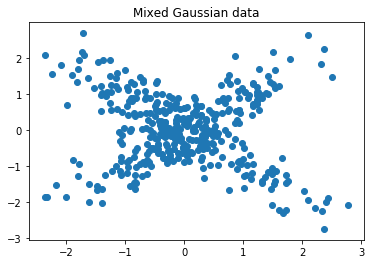

In [22]:
plot_data(X, select_data.value)

In [23]:
# Add ground truth of data to results
results['Ground Truth'] = ground_truth

### Select and run model

In [24]:
select_model

Dropdown(description='Select model: ', options=('Linear Regression', 'Kraskov', 'Cart Reg', 'MINE_direct', 'MI…

In [25]:
btn_sim

Button(description='Run simulation', style=ButtonStyle())

In [26]:
btn_result

Button(description='Show result', style=ButtonStyle())